In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


8/8 [==============================] - 146s 18s/step


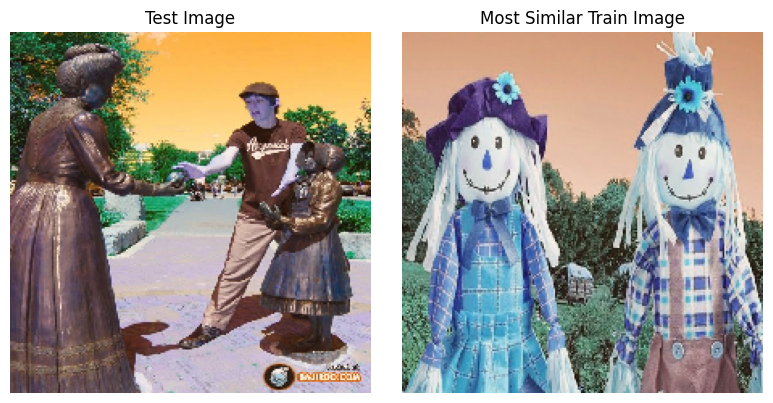

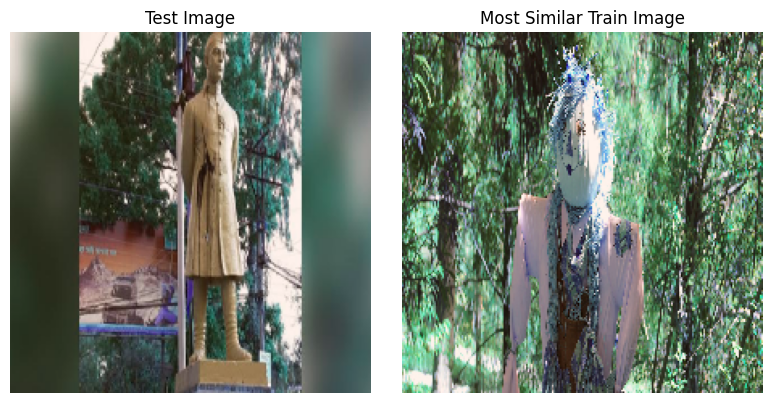

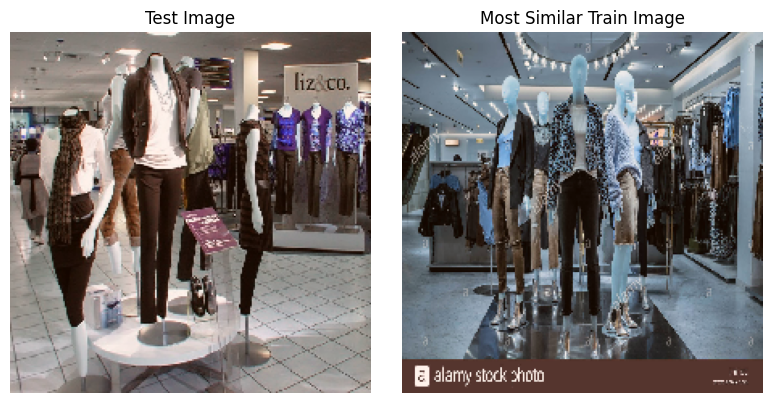

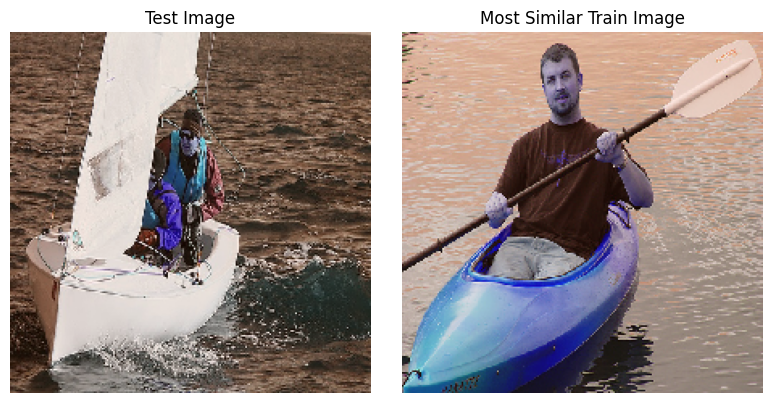

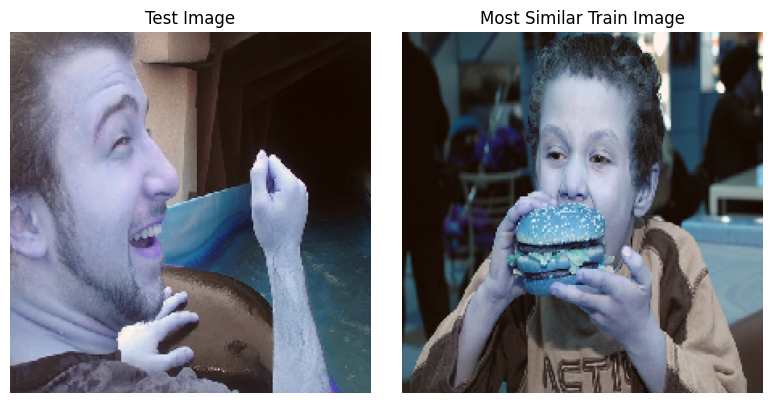

In [8]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Load and preprocess images
def load_and_preprocess_images(folder_path, target_size=(224, 224)):
    images = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg"):
            image_path = os.path.join(folder_path, filename)
            img = image.load_img(image_path, target_size=target_size)
            img = image.img_to_array(img)
            img = np.expand_dims(img, axis=0)
            img = preprocess_input(img)
            images.append(img)
    return np.vstack(images)

# Define folder paths for pedestrian and non-pedestrian images
pedestrian_folders = [
    "/content/drive/MyDrive/ML1/JPEGImagesTest",
    "/content/drive/MyDrive/ML1/JPEGImagesTrain",
    # Add more pedestrian folders as needed
]

non_pedestrian_folders = [
    "/content/drive/MyDrive/ML1/JPEGImagesTest",
    # Add more non-pedestrian folders as needed
]

# Load train and test images
train_images = load_and_preprocess_images(pedestrian_folders[1])  # Select one of the pedestrian folders
test_images = load_and_preprocess_images(non_pedestrian_folders[0])  # Select one of the non-pedestrian folders

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_conv3').output)

# Extract features for train and test images
train_features = model.predict(train_images)
test_features = model.predict(test_images)

# Calculate cosine similarity between train and test features
similarities = cosine_similarity(test_features.reshape(len(test_features), -1),
                                 train_features.reshape(len(train_features), -1))

# Function to plot matching characteristics
def plot_matching_characteristics(test_images, train_images, similarities, num_examples=5):
    for i in range(num_examples):
        test_img = test_images[i]
        similarity_scores = similarities[i]

        # Find the index of the most similar train image
        most_similar_index = np.argmax(similarity_scores)

        # Get the most similar train image
        train_img = train_images[most_similar_index]

        # Rescale pixel values to the range [0, 255] (as required by `plt.imshow`)
        test_img = ((test_img - test_img.min()) / (test_img.max() - test_img.min()) * 255).astype(np.uint8)
        train_img = ((train_img - train_img.min()) / (train_img.max() - train_img.min()) * 255).astype(np.uint8)

        # Plot the test and most similar train images
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(test_img)
        plt.title("Test Image")
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.imshow(train_img)
        plt.title("Most Similar Train Image")
        plt.axis("off")

        plt.tight_layout()
        plt.show()

# Plot matching characteristics for the first 5 test images
plot_matching_characteristics(test_images, train_images, similarities, num_examples=5)
